In [2]:
""" 
    Skeleton code for k-means clustering mini-project.
"""
import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from sklearn.cluster import KMeans
%matplotlib inline

# Clustering Features

The starter code can be found in `k_means/k_means_cluster.py`, which reads in the email + financial (E+F) dataset and gets us ready for clustering. You’ll start with performing k-means based on just two financial features--take a look at the code, and determine which features the code uses for clustering.

Run the code, which will create a scatterplot of the data. Think a little bit about what clusters you would expect to arise if 2 clusters are created.

## Deploying Clustering

Deploy k-means clustering on the financial_features data, with 2 clusters specified as a parameter. Store your cluster predictions to a list called pred, so that the Draw() command at the bottom of the script works properly. 
### In the scatterplot that pops up, are the clusters what you expected?

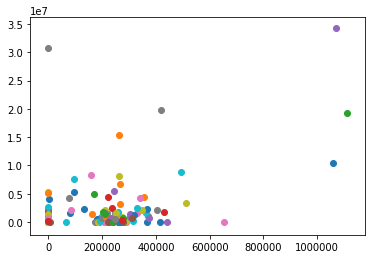

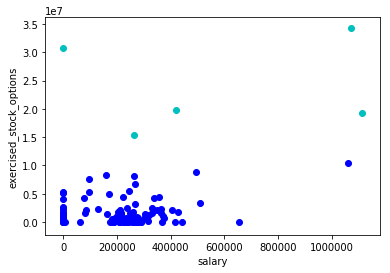

In [3]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

kmeans = KMeans(n_clusters=2, random_state=0).fit(finance_features)
pred = kmeans.predict(finance_features)


### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"


#### options:
- A. Yes, exactly what I expected
- B. Roughly, but there were a few surprises
- C. No, but they, made sense after I saw them
- D. No, I don't see how those clusters are right

## Answer:  D



## Clustering with 3 features

Add a third feature to features_list, “total_payments". Now rerun clustering, using 3 input features instead of 2 (obviously we can still only visualize the original 2 dimensions). Compare the plot with the clusterings to the one you obtained with 2 input features. Do any points switch clusters? How many? This new clustering, using 3 features, couldn’t have been guessed by eye--it was the k-means algorithm that identified it.

(You'll need to change the code that makes the scatterplot to accommodate 3 features instead of 2, see the comments in the starter code for instructions on how to do this.)

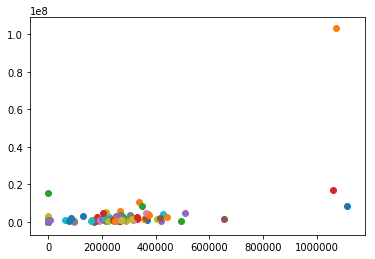

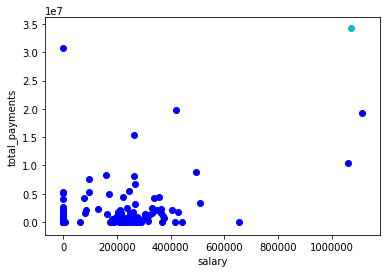

In [4]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2", f3_name="feature_3"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f3_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2, f3 in finance_features:
    plt.scatter( f1, f3 )
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

kmeans = KMeans(n_clusters=2, random_state=0).fit(finance_features)
pred = kmeans.predict(finance_features)


### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2, f3_name=feature_3)
except NameError:
    print "no predictions object named pred found, no clusters to plot"


## Stock Option Range

In the next lesson, we’ll talk about feature scaling. It’s a type of feature preprocessing that you should perform before some classification and regression tasks. Here’s a sneak preview that should call your attention to the general outline of what feature scaling does.

**What are the maximum and minimum values taken by the “exercised_stock_options” feature used in this example?**

(NB: if you look at finance_features, there are some "NaN" values that have been cleaned away and replaced with zeroes--so while those might look like the minima, it's a bit deceptive because they're more like points for which we don't have information, and just have to put in a number. So for this question, go back to data_dict and look for the maximum and minimum numbers that show up there, ignoring all the "NaN" entries.)

In [5]:
exercised_stock_options = [person['exercised_stock_options'] for person_name, person in data_dict.items() if person['exercised_stock_options'] != 'NaN']
exercised_stock_options = sorted(exercised_stock_options)
min_exercised_stock_options = exercised_stock_options[0]
max_exercised_stock_options = exercised_stock_options[-1]
print("minimum exercised stock options: {}".format(min_exercised_stock_options))
print("maximum exercised stock options: {}".format(max_exercised_stock_options))

minimum exercised stock options: 3285
maximum exercised stock options: 34348384


## Salary Range

### What are the maximum and minimum values taken by “salary”?

(NB: same caveat as in the last quiz. If you look at finance_features, there are some "NaN" values that have been cleaned away and replaced with zeroes--so while those might look like the minima, it's a bit deceptive because they're more like points for which we don't have information, and just have to put in a number. So for this question, go back to data_dict and look for the maximum and minimum numbers that show up there, ignoring all the "NaN" entries.)

In [6]:
salary = [person['salary'] for person_name, person in data_dict.items() if person['salary'] != 'NaN']
salary = sorted(salary)
min_salary = salary[0]
max_salary = salary[-1]
print("minimum salary: {}".format(min_salary))
print("maximum salary: {}".format(max_salary))

minimum salary: 477
maximum salary: 1111258


## Clustering Changes

The plot on the next slide shows the exact same clustering code that you just wrote, but in this example we applied feature scaling before performing the clustering.

We want you to compare the clustering with scaling (on the next slide) with the first clustering visualization you produced, when you used **two features** in your clustering algorithm.

Notice that now the range of the features has changed to [0.0, 1.0]. That's the only change we've made.

In the next lesson you’ll learn a lot more about what feature scaling means, but for now, just look at the effect on the clusters--**which point(s) switch their associated cluster?**

# Feature Scaling

## Feature Scaling Mini Project

In the last project, you performed k-means clustering on the Enron characters using their financial data as inputs. We’ll update that work to include scaled features, to see how that changes things.

Look back to the last part of the K-Means Clustering Mini-Project. We deployed scaling there without going into the details of the scaling algorithm, but now you know much more about specific scaling algorithms and can diagnose what kind of scaling we were using.

### What type of scaling was deployed?
MinMaxScaler

### Computing rescaled features

Apply feature scaling to your k-means clustering code from the last lesson, on the “salary” and “exercised_stock_options” features (use only these two features). **What would be the rescaled value of a "salary" feature that had an original value of $200,000, and an "exercised_stock_options" feature of $1 million?** (Be sure to represent these numbers as floats, not integers!)

In [25]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
salary = [person['salary'] for _, person in data_dict.items() if person['salary'] != 'NaN']
salary = np.array(salary, dtype=np.float64).reshape(-1, 1)
salary_scaler = MinMaxScaler()
salary_scaler.fit(salary)
salary_scaler.transform([[200000.]])

array([[0.17962407]])

In [24]:
exercised_stock_options = [person['exercised_stock_options'] for _, person in data_dict.items() if person['exercised_stock_options'] != 'NaN']
exercised_stock_options = np.array(exercised_stock_options, dtype=np.float64).reshape(-1, 1)
exercised_stock_options_scaler = MinMaxScaler()
exercised_stock_options_scaler.fit(exercised_stock_options)
exercised_stock_options_scaler.transform([[1000000.]])

array([[0.02902059]])

## When to deploy feature scaling

One could argue about whether rescaling the financial data is strictly necessary, perhaps we want to keep the information that a `$100,000 salary` and `$40,000,000` in stock options are dramatically different quantities. What if we wanted to cluster based on “from_messages” (the number of email messages sent from a particular email account) and “salary”? **Would feature scaling be unnecessary in this case, or critical?**

options

- unneccessary
- critical
- i'm tired

Answer: critical